# Intro to Numpy

**Attribution note**: This notebook was created by David Dotson and Oliver Beckstein and is made available under a CC-BY 4.0 license. Some of the material was inspired by lessons developed by [Software Carpentry](http://software-carpentry.org/) ([Programming with Python](http://swcarpentry.github.io/python-novice-inflammation/)), as well as material previously created by Oliver Beckstein ([Python and Numpy for SimBioNano PHY 598](http://becksteinlab.physics.asu.edu/pages/courses/2013/SimBioNano/04/PythonAndNumpy/p04_class.html)).

When it comes to doing numerical work, Python by itself is rather slow. By slow we mean compared to languages like C and Fortran, which benefit from being **compiled** languages in which a program is preprocessed into machine code by a compiler. Python by contrast is an **interpreted** language, in which each line in a program is fed to the Python interpreter in sequence, then executed. The flexiblity and ease of use that come with Python come at the cost of pure performance.

However, though Python code itself may be slow, Python can be used to run code that is written in a compiled language and already compiled. We will use a library (a.k.a., a Python *module*) that does exactly this underneath the hood to get fast performance for numerical operations on arrays.

In [1]:
import numpy

Importing a module is like taking a piece of equipment out of a storage locker and setting it up on a lab bench. Importing the name `numpy` makes all the functions and classes (object types) available to us. The core data structure that `numpy` provides is known as the `numpy` array:

In [2]:
somenums = numpy.array([1, 2, 3, 4])
print(somenums)

[1 2 3 4]


A numpy array looks superfically similar to a `list`, which is a builtin to Python. They are fundamentally different, however, in how they both work and how they exist in memory. `numpy` arrays don't store references to other objects, but instead point to contiguous blocks of memory in which each element is of exactly the same data type. For instance, we just made an array of 64 bit integers:

In [4]:
somenums.dtype

dtype('int64')

In [5]:
# this will give an array with a string dtype
numpy.array(['Han Solo', "Kylo Ren", 7])

array(['Han Solo', 'Kylo Ren', '7'], 
      dtype='<U8')

In [6]:
# this will give an array of 64 bit floats
floats = numpy.array([63.3, -5.0, 1])
print(floats)

[ 63.3  -5.    1. ]


In [7]:
floats.dtype

dtype('float64')

Also, because arrays are not a collection of objects but are a single object of identically sized pieces of data, they cannot be resized. To add elements to an array, one must create a new array.

In [8]:
# this will create a new array with repeated elements
numpy.hstack([somenums, somenums])

array([1, 2, 3, 4, 1, 2, 3, 4])

## Array methods (or, arrays are objects)

`numpy` arrays are built for numerical operations, and doing them quickly. Since like everything in Python these are *objects*, they include built-in methods such as:

In [9]:
somenums.mean()

2.5

In [10]:
somenums.std()

1.1180339887498949

and a whole plethora of others. You can get a view of what methods and attributes are part of an array's namespace with:

In [11]:
dir(somenums)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__r

or in the notebook, by typing the name of the array followed by a `.` and the tab key:

In [ ]:
somenums.

Recall that you can also get the documentation for any function or method with a question mark at the end of the name:

In [11]:
somenums.mean?

## Multidimensionality, indexing, and slicing

`numpy` arrays can be of any dimensionality, not just 1-D. It's common to encounter 2-D arrays, and for illustration we'll look at the position of a particle in three dimensions with time:

In [13]:
import numpy as np

The `create_position()` function is just a helper function that we will use throughout the notebook in order to quickly generate interesting data.

In [14]:
def create_position(nframes=10**6):
    """Get array of x, y, and z position of a particle with time.
    
    Parameters
    ----------
    nframes: int
        number of frames; more frames increases the resolution
        of the trajectory, but not its length
        
    Returns
    -------
    position : `nframes` x 3 array
        (x, y, z) position of the particle with time
        
    """
    # generate x, y, z positions
    x = np.cos(np.linspace(0, 20, nframes))
    y = 3 * np.sin(np.linspace(0, 10, nframes))
    z = -2 * np.sin(np.pi * np.linspace(0, 5, nframes))

    # put them all in a single array; this gives
    # an array with 3 rows and nframes columns
    position = np.array([x, y, z])

    # transposing puts the array into the [[x, y, z], [x, y, z], ...] shape
    return position.transpose()

Let's generate an array `position` to work with:

In [15]:
position = create_position()

In [16]:
position.shape

(1000000, 3)

Now say we wanted to examine the position of the particle in the very first frame (row), we could do:

In [17]:
position[0]

array([ 1.,  0., -0.])

to extract it. Notice that indexing starts at 0, as is the convention in Python.

What about the third frame?

In [18]:
position[2]

array([  9.99999999e-01,   6.00000600e-05,  -6.28319159e-05])

In zero-based terms, this we would call the "first frame" the zeroth frame, and so on. To avoid confusion we'll assume this from now on.

What if we wanted a bunch of frames, but only the 5th through the 72nd? It should have 68 rows:

In [19]:
position[5:73].shape

(68, 3)

Notice the **slicing** notation. Remember, this should be read as

> "Get each row in the array starting from the row at index 5 up to and not including the row at index 73."

We could even coarse-grain by slicing out every fifth row in this range:

In [20]:
position[5:73:5].shape

(14, 3)

Now what if we wanted a specific *element* of the array? Indexing works for this too:

In [21]:
position[42, 1]

0.0012600012229571492

This is the y-position of the 42nd frame. 

NOTE: **The numpy indexing notation differs from Python indexing of nested lists**, which would look like `positions[42][1]`. 

Incidentally, this also works for numpy arrays but is less readable and slower, as we can demonstrate with the `%timeit` magic function of IPython/Jupyter:

In [22]:
%timeit position[42, 1]

129 ns ± 1.33 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [23]:
%timeit position[42][1]

258 ns ± 3.71 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


The first index/slice corresponds to the first *axis* of the array, which for a 2-D array corresponds to the rows. The second index/slice would then be the columns. If we had a 3-D array, indexing the first axis would yield 2-D arrays. If we had a 4-D array, indexing the first axis would yield 3-D arrays, and so on.

### Example: Numpy slicing

Obtain an array giving the mean of the x, y positions (separately) from the frame at index 10 to the frame at index 43 as a 1-D array.

We can do this by slicing both the first axis (rows) and the second axis (columns), then using the `mean` method of the resulting array. To only take a mean across the rows (a mean for each column), we must specify the `axis=0` keyword.

In [28]:
position[10:42, :2].mean(axis=0)

array([  9.99999853e-01,   7.65000753e-04])

What if we wanted the smaller of the two numbers only?

In [29]:
position[10:43, :2].mean(axis=0).min()

0.00078000076767674302

Since slicing and methods of arrays often yield arrays, you can chain operations in this way. This is what qualifies as a *pythonic* way to work with these objects.

### Fancy and boolean indexing

It's also possible to index arrays with lists of indices to select out; these can be repeated and in any order.

In [30]:
position[[2, 4, 7, -1, 2]]

array([[  9.99999999e-01,   6.00000600e-05,  -6.28319159e-05],
       [  9.99999997e-01,   1.20000120e-04,  -1.25663832e-04],
       [  9.99999990e-01,   2.10000210e-04,  -2.19911705e-04],
       [  4.08082062e-01,  -1.63206333e+00,  -1.22464680e-15],
       [  9.99999999e-01,   6.00000600e-05,  -6.28319159e-05]])

We can also use arrays of booleans to get back arrays with items for which `True` was the value in the boolean array used:

In [31]:
(position[:, :2] > 2).any(axis=1)

array([False, False, False, ..., False, False, False], dtype=bool)

We can use this array to get only the rows for which either the x or y position is greater than 2:

In [32]:
position[(position[:,:2] > 2).any(axis=1)].shape

(336428, 3)

Boolean arrays are useful for filtering data for rows of interest.

**Technical note**: fancy and boolean indexing like this generally gives back a new array instead of a *view* to the existing one. Slicing, by contrast, always gives a view. This matters when using indexing or slicing to alter the values in an array.

## Array arithmetic 

In [33]:
position = create_position()

We can do anything with arrays of the same shape that we can do with single numbers.

In [34]:
((2 * position + position) * position)**.5

array([[  1.73205081e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.73205081e+00,   5.19615762e-05,   5.44140353e-05],
       [  1.73205081e+00,   1.03923152e-04,   1.08828071e-04],
       ..., 
       [  7.06882115e-01,   2.82672941e+00,   1.08828071e-04],
       [  7.06850490e-01,   2.82677301e+00,   5.44140353e-05],
       [  7.06818865e-01,   2.82681661e+00,   2.12115048e-15]])

is the same (up to rounding errors — see next lecture) as $\sqrt{(2r + r) \cdot r} = \sqrt{3r^2} = r \sqrt{3}$

In [35]:
position * 3**.5

array([[  1.73205081e+00,   0.00000000e+00,  -0.00000000e+00],
       [  1.73205081e+00,   5.19615762e-05,  -5.44140353e-05],
       [  1.73205081e+00,   1.03923152e-04,  -1.08828071e-04],
       ..., 
       [  7.06882115e-01,  -2.82672941e+00,  -1.08828071e-04],
       [  7.06850490e-01,  -2.82677301e+00,  -5.44140353e-05],
       [  7.06818865e-01,  -2.82681661e+00,  -2.12115048e-15]])

Note that multiplication between two arrays is **not** the same as matrix multiplcation. **Arithmetic operations are element-wise.**

In [36]:
np.array([0, -1, 10]) * np.array([3, 5, -1])

array([  0,  -5, -10])

 But there is a method for doing matrix multiplication:

In [37]:
np.dot(np.array([0, -1, 10]), np.array([3, 5, -1]))

-15

And more linear algebra functions can be found in the [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) module:

In [ ]:
dir(np.linalg)

## Thinking in arrays 

Say we wanted to displace our particle a full 5 units in each of the x, y, and z directions. If you have experience with a language like C, you might be used to writing nested loops like this one to achieve this:

In [38]:
position = create_position()

(We use the `%%time` magic to get the time for a whole code block.)

In [39]:
%%time
for i in range(position.shape[0]):
    for j in range(position.shape[1]):
        position[i, j] += 5

CPU times: user 2.06 s, sys: 7.98 ms, total: 2.07 s
Wall time: 2.08 s


Even slower when you try to do it in a "Pythonic" fashion with the (otherwise very good!) `enumerate()` function:

In [40]:
position = create_position()

In [41]:
%%time
for i, row in enumerate(position):
    for j, element in enumerate(row):
        position[i, j] += 5     

CPU times: user 3.11 s, sys: 9.24 ms, total: 3.12 s
Wall time: 3.12 s


In [42]:
position

array([[ 6.        ,  5.        ,  5.        ],
       [ 6.        ,  5.00003   ,  4.99996858],
       [ 6.        ,  5.00006   ,  4.99993717],
       ..., 
       [ 5.40811858,  3.36798701,  4.99993717],
       [ 5.40810032,  3.36796184,  4.99996858],
       [ 5.40808206,  3.36793667,  5.        ]])

But one of the main points of `numpy` is performance, so we'd do better to spend as little time in an operation running through the Python interpreter, which is the case in the above loop. Instead we can do:

In [43]:
position = create_position()

In [44]:
%%time
position += 5

CPU times: user 4.93 ms, sys: 1.44 ms, total: 6.37 ms
Wall time: 4.23 ms


Speed-up for using array operations instead of `for` loops:

In [45]:
2.06 / 4.93e-3

417.8498985801217

On my laptop the difference in speed is about a factor of 400 (you might see speed-ups on the order of 100 to 1000). The larger the array the more pronounced the difference in speed will be, too. The general rule when using `numpy` is to try and put what you're trying to do in terms of operations on whole arrays (or slices of them). **Avoid Python loops unless absolutely necessary.**

### Example: array arithmetic with *broadcasting*

Rescale (multiply) the y-positions by 2 and displace the x and z positions by 3 and -100, respectively.

There are a lot of ways to do this, but the most succinct way is to take advantage of *broadcasting*. That is, doing:

In [46]:
position = create_position()

In [47]:
position = position * np.array([1, 2, 1]) + np.array([3, 0, -100])

`numpy` will take the 3-element, 1-D arrays here and apply them to whole columns in `position`. Note that we already took advantage of broadcasting rules in a way, since multiplying an array by a scalar is the same as multiplying the array by an array of equal shape with all elements equal to the scalar.

# Plotting with matplotlib

> The purpose of computing is insight, not numbers.
>
> — <cite>Richard Hamming</cite>

We want to do more with arrays than calculate single values or look closely at their elements. A core part of doing science is gaining insight into the patterns revealed by data, for which **visualization** is key. We can produce publication-quality plots from `numpy` arrays with [`matplotlib`](https://matplotlib.org/).

In [48]:
# we want to use the pyplot interface
import matplotlib.pyplot as plt

In [49]:
# this tells the notebook to render plots inline
%matplotlib inline

In [50]:
position = create_position()

Let's plot the x position of our particle as a function of frame:

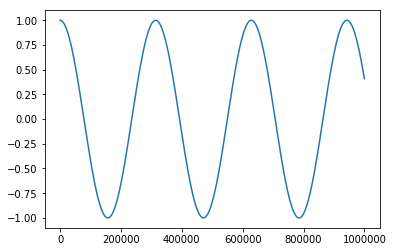

In [51]:
plt.plot(position[:, 0])

And then perhaps the x and y position on the x- and y-axis, respectively:

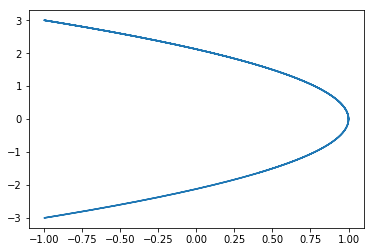

In [52]:
plt.plot(position[:, 0], position[:, 1])

`matplotlib` is said to make easy things easy and hard things possible when it comes to plotting. Let's make a three-panel plot giving the x, y, and z position as a function of frame.

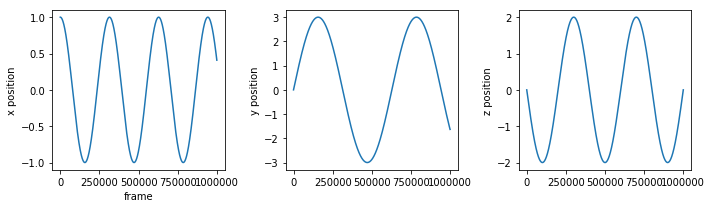

In [53]:
fig = plt.figure(figsize=(10,3))

# make an axis object for the figure, each with a different position
# on a grid that has 1 row and 3 columns of axes
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot the x position
ax1.set_ylabel('x position')
ax1.set_xlabel('frame')
ax1.plot(position[:, 0])

# plot the y position
ax2.set_ylabel('y position')
ax1.set_xlabel('frame')
ax2.plot(position[:, 1])

# plot the z position
ax3.set_ylabel('z position')
ax1.set_xlabel('frame')
ax3.plot(position[:, 2])

fig.tight_layout()

There's plenty more we could do with this to make it prettier. For a primer on making visually appealing and informative plots, check out [this notebook](https://github.com/Becksteinlab/making-prettier-plots/blob/master/Making%20better%20plots.ipynb).

### 3D plotting
Matplotlib has [basic 3D capabilities](http://matplotlib.org/1.3.1/mpl_toolkits/mplot3d/tutorial.html); for more sophisticated plots check out [mayavi](http://docs.enthought.com/mayavi/mayavi/).

In [60]:
%matplotlib inline

(You can also try `%matplotlib notebook` or `%matplotlib ipympl` and if you are lucky, you will be able to get an interactive 3D graphic. However, that does not always seem to work.)

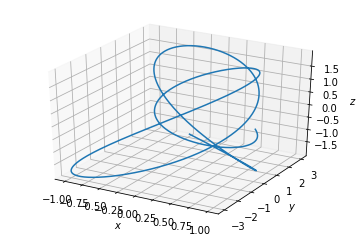

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = position.transpose()
ax.plot(x, y, z)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")